<a href="https://colab.research.google.com/github/nekotanku/colab/blob/master/Udemy_pytorch_%E8%BB%A2%E7%A7%BB%E5%AD%A6%E7%BF%92.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import torch 
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from torchvision import datasets, models, transforms

In [4]:
 #Gpuの設定
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [5]:
#データのダウンロード
!wget https://download.pytorch.org/tutorial/hymenoptera_data.zip

--2020-08-06 07:39:17--  https://download.pytorch.org/tutorial/hymenoptera_data.zip
Resolving download.pytorch.org (download.pytorch.org)... 13.224.166.106, 13.224.166.66, 13.224.166.17, ...
Connecting to download.pytorch.org (download.pytorch.org)|13.224.166.106|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 47286322 (45M) [application/zip]
Saving to: ‘hymenoptera_data.zip’

hymenoptera_data.zi 100%[===================>]  45.10M   158MB/s    in 0.3s    

2020-08-06 07:39:18 (158 MB/s) - ‘hymenoptera_data.zip’ saved [47286322/47286322]



In [6]:
!ls

hymenoptera_data.zip  sample_data


In [7]:
!unzip hymenoptera_data.zip

Archive:  hymenoptera_data.zip
   creating: hymenoptera_data/
   creating: hymenoptera_data/train/
   creating: hymenoptera_data/train/ants/
  inflating: hymenoptera_data/train/ants/0013035.jpg  
  inflating: hymenoptera_data/train/ants/1030023514_aad5c608f9.jpg  
  inflating: hymenoptera_data/train/ants/1095476100_3906d8afde.jpg  
  inflating: hymenoptera_data/train/ants/1099452230_d1949d3250.jpg  
  inflating: hymenoptera_data/train/ants/116570827_e9c126745d.jpg  
  inflating: hymenoptera_data/train/ants/1225872729_6f0856588f.jpg  
  inflating: hymenoptera_data/train/ants/1262877379_64fcada201.jpg  
  inflating: hymenoptera_data/train/ants/1269756697_0bce92cdab.jpg  
  inflating: hymenoptera_data/train/ants/1286984635_5119e80de1.jpg  
  inflating: hymenoptera_data/train/ants/132478121_2a430adea2.jpg  
  inflating: hymenoptera_data/train/ants/1360291657_dc248c5eea.jpg  
  inflating: hymenoptera_data/train/ants/1368913450_e146e2fb6d.jpg  
  inflating: hymenoptera_data/train/ants/147318

In [8]:
!ls

hymenoptera_data  hymenoptera_data.zip	sample_data


In [9]:
!ls hymenoptera_data

train  val


In [10]:
!ls hymenoptera_data/train

ants  bees


In [12]:
#前処理
transform = transforms.Compose([transforms.Resize((244,244)),
                                transforms.ToTensor(), 
                                transforms.Normalize((0.5,), (0.5))
                                ])


In [13]:
#データセット作成
train_dataset = datasets.ImageFolder("./hymenoptera_data/train", transform=transform)

In [14]:
#DataLoader
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

In [22]:
data_iter = iter(train_loader)

In [23]:
imgs, labels = data_iter.next()

In [24]:
labels

tensor([0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
        0, 0, 0, 0, 1, 0, 0, 0])

In [25]:
imgs.size()

torch.Size([32, 3, 244, 244])

In [26]:
img = imgs[0]

In [27]:
img_permute = img.permute(1, 2, 0)
img_permute = 0.5 * img_permute + 0.5
img_permute = np.clip(img_permute, 0, 1)

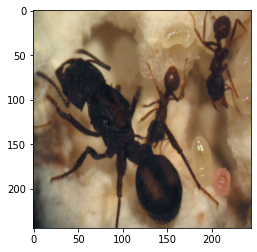

In [28]:
plt.imshow(img_permute)

In [29]:
#モデル定義(学習済モデル)
model = models.resnet18(pretrained=True)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth


In [30]:
#学習しない層の勾配計算をFalse
for param in model.parameters():
    param.requires_grad = False

In [31]:
#層を付け替え
model.fc = nn.Linear(512, 2)

In [32]:
print(model)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [33]:
#GPUにモデルを送る
model.to(device)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [36]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.fc.parameters(), lr=0.001)


In [38]:
num_epochs = 15
losses = []
accs = []
for epoch in range(num_epochs):
    running_loss = 0.0
    running_acc = 0.0
    for imgs, labels in train_loader:
        imgs = imgs.to(device)
        labels = labels.to(device)
        optimizer.zero_grad()
        output = model(imgs)
        loss = criterion(output, labels)
        running_loss += loss.item()
        pred = torch.argmax(output, dim=1)
        running_acc += torch.mean(pred.eq(labels).float())
        loss.backward()
        optimizer.step()
    running_loss /= len(train_loader)
    running_acc /= len(train_loader)
    losses.append(running_loss)
    accs.append(running_acc)
    print("epoch:{}, loss:{}, acc:{}".format(epoch, running_loss, running_acc))
    

epoch:0, loss:0.719846785068512, acc:0.54296875
epoch:1, loss:0.5748647972941399, acc:0.7109375
epoch:2, loss:0.42100224271416664, acc:0.842968761920929
epoch:3, loss:0.35047420859336853, acc:0.8921874761581421
epoch:4, loss:0.31973130628466606, acc:0.8890625238418579
epoch:5, loss:0.2843806277960539, acc:0.909375011920929
epoch:6, loss:0.2452043630182743, acc:0.932812511920929
epoch:7, loss:0.22390813380479813, acc:0.9390624761581421
epoch:8, loss:0.20045474916696548, acc:0.948437511920929
epoch:9, loss:0.1939222663640976, acc:0.9585937261581421
epoch:10, loss:0.16809348575770855, acc:0.96875
epoch:11, loss:0.1703477967530489, acc:0.960156261920929
epoch:12, loss:0.16220715921372175, acc:0.96875
epoch:13, loss:0.15401423070579767, acc:0.9664062261581421
epoch:14, loss:0.16812587343156338, acc:0.94921875


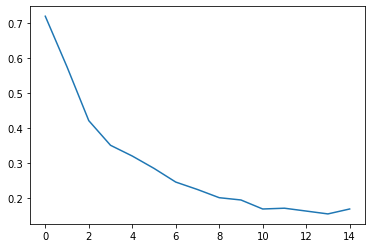

In [39]:
plt.plot(losses)

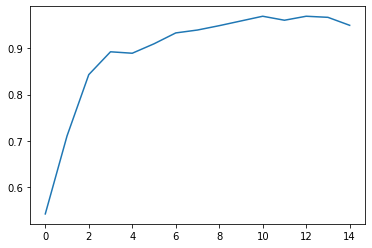

In [40]:
plt.plot(accs)